1. perform facet grid of histograms and/or scatterplots, or...

# Data Analysis on bank loans from Prosper
### by Aaron Remski

> The dataset used for this analysis has ~114,000 records containing data on bank loans from 2005-2014. It includes 81 features ranging from the borrower's credit grade to their stated monthly income.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows', 150) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format # set it to convert scientific notation such 
# as 4.22510e+11 to 42251000462321.00

In [2]:
############################################################################
## (Un)Comment out if using a lighter background style in Jupyter
plt.style.use("dark_background")

In [3]:
# load data into pandas dataframe!
loanDF = pd.read_csv("prosperLoanData.csv")

## Dataset Overview


In [4]:
# width & height
loanDF.shape

(113937, 81)

In [5]:
# review loanDF variables & identify features that require additional tidying/cleaning
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# see sample of data
loanDF.sample(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
77211,18AC3409511408465C90B39,255230,2007-12-24 13:20:23.277000000,AA,36,Completed,2009-08-24 00:00:00,0.0768,0.0700,0.0700,NaN,NaN,NaN,NaN,NaN,NaN,2,CA,Teacher,Full-time,195.0000,True,False,NaN,2007-12-24 12:57:43.220000000,800.0000,819.0000,1991-03-07 00:00:00,11.0000,11.0000,40.0000,11,42.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3885.0000,0.0100,196915.0000,40.0000,0.9700,2.0000,0.0600,"$25,000-49,999",True,4019.8333,7BA53408264557618C5B094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,74,24277,7000,2008-01-03 00:00:00,Q1 2008,340634090779138018BFE68,216.1400,7358.6500,7000.0000,358.6500,0.0000,-110.2300,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,202
97863,EAF03517538727097ABF831,511494,2011-06-15 06:00:02.190000000,NaN,36,Past Due (1-15 days),NaN,0.3564,0.3199,0.3099,0.2957,0.1470,0.1487,2.0000,E,4.0000,7,VA,Civil Service,Employed,274.0000,True,False,NaN,2011-06-02 18:53:35,740.0000,759.0000,1995-01-19 00:00:00,12.0000,9.0000,25.0000,5,585.0000,1.0000,3.0000,0.0000,0.0000,11.0000,0.0000,0.0000,28323.0000,0.9900,226.0000,23.0000,0.9500,3.0000,0.2200,"$50,000-74,999",True,5894.0000,79D73621832571340648C2E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,33,50440,2500,2011-06-28 00:00:00,Q2 2011,9A073516299575184347792,108.8700,3344.9700,1926.1100,1418.8600,-43.8800,-18.5100,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,23
26494,5AD935766024274531B4921,764684,2013-05-01 15:33:02.223000000,NaN,60,Current,NaN,0.1650,0.1419,0.1319,0.1260,0.0424,0.0836,5.0000,B,6.0000,1,SC,Other,Other,1.0000,True,False,NaN,2013-04-17 10:43:45,740.0000,759.0000,1991-09-01 00:00:00,5.0000,5.0000,26.0000,4,158.0000,0.0000,3.0000,1.0000,18532.0000,6.0000,0.0000,0.0000,5139.0000,0.3600,5255.0000,18.0000,0.9400,0.0000,0.1000,"$25,000-49,999",True,4083.3333,15D4368159281854132759D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,10,89852,8000,2013-05-07 00:00:00,Q2 2013,C9E0357705255446808D1BE,186.9300,1682.3700,864.4600,817.9100,-57.6500,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,1
56387,CD72342039288947880E385,335824,2008-05-20 07:58:34.573000000,C,36,Completed,2011-05-30 00:00:00,0.2224,0.2000,0.1900,NaN,NaN,NaN,NaN,NaN,NaN,1,MA,Executive,Full-time,14.0000,True,False,NaN,2008-05-20 07:49:25.987000000,660.0000,679.0000,1989-03-21 00:00:00,10.0000,9.0000,32.0000,5,912.0000,3.0000,21.0000,0.0000,0.0000,0.0000,0.0000,0.0000,26069.0000,0.8700,3886.0000,31.0000,0.8300,1.0000,0.0900,"$100,000+",True,20833.33

## Structure of Dataset summarized
* ~114,000 records with 81 characteritics on completed, defaulted, current, & other types of bank loans. <br>
### Noteable Features
IncomeRange, CreditGrade, Term, LoanStatus, CloseDate, BorowerAPR, BorrowerRate,  LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, ExmploymentStatus, ExmploymentStatusDuration, ListingNumber, ListingCreationDate, 

## Assessing Dataset

* Roughly 20 features will be removed to clean dataset <br>
* 4 (features)variables express dates, e.g. ListingCreationDate, ClosedDate, DateCreditPulled, LoanOriginationDate. Convert to datetime type<br>
* Several (variables)columns types need to be converted, e.g. CreditGrade, ProsperRating (Alpha), IncomeRange to the ordered categorical type<br>


In [7]:
##################### DELETE THIS CELL? ########################################################
# Columns to keep
keep = ['ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','CloseDate','BorrowerAPR','BorrowerRate',
    'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
    'ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','ExmploymentStatus','ExmploymentStatusDuration']

In [8]:
# Columns to remove
remove = ['ListingKey', 'TotalTrades','TradesNeverDelinquent (percentage)', 'LoanKey','TotalProsperLoans','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPrincipalBorrowed',
          'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination',
          'LoanNumber','MemberKey']

## Data Cleaning
### Remove features that have too much data missing & provide no meaningful purpose in the present analysis.

In [9]:
# remove columns defined in 'remove' list to work with a roughly smaller dataframe
# show/verify remaining columns after removal

loanDF = loanDF.drop(remove, axis=1)
loanDF.columns

Index(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCre

### Convert alpha columns into ordered categories

In [10]:
# This is where the ordinal_categories will be defined & converted
# convert CreditGrade, ProsperRating (Alpha), & IncomeRange to ordinal categorical types
# CreditGrade, & ProsperRating (Alpha): order assumed

ordinal_dict = {'CreditGrade': ['AA','A','B','C','D','E','HR'],
                    'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR'],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999',
                                   '$1-24,999','0','Not employed','Not displayed']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_dict[var])
    loanDF[var] = loanDF[var].astype(ordered_var)    

In [11]:
# confirm ordered categorical datatype converted
loanDF.CreditGrade.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

In [12]:
# confirm IncomeRange dtype converted
loanDF.IncomeRange.dtype

CategoricalDtype(categories=['$100,000+', '$75,000-99,999', '$50,000-74,999',
                  '$25,000-49,999', '$1-24,999', '0', 'Not employed',
                  'Not displayed'],
, ordered=True)

### Datatime type updates

In [13]:
# Convert type of date fields to datetime64[ns]

datecols = ['ListingCreationDate','ClosedDate','DateCreditPulled','LoanOriginationDate']

for datecol in datecols:
    loanDF[datecol] = pd.to_datetime(loanDF[datecol])

In [14]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

In [15]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

### Additional data cleaning considerations
1. Is there a consistent delta between the BorrowerRate & BorrowerAPR
2. The year should be removed from LoanOriginationQuarter 

### What time range on loans are we dealing with?

In [16]:
# get timeframe of loans
print("LoanOriginationDate: \n")
print(f"Earliest Loan Origination Date: {loanDF.LoanOriginationDate.min()}")
print(f"Latest Loan Origination Date: {loanDF.LoanOriginationDate.max()}\n\n")

print("ListingCreationDate: \n")
print(f"Earliest Listing Creation Date: {loanDF.ListingCreationDate.min()}")
print(f"Latest Listing Creation Date: {loanDF.ListingCreationDate.max()}\n\n")

print("ClosedDate: \n")
print(f"Earliest Closed Date: {loanDF.ClosedDate.min()}")
print(f"Latest Closed Date: {loanDF.ClosedDate.max()}\n\n")

print("DateCreditPulled: \n")
print(f"Earliest Date Credit Pulled: {loanDF.DateCreditPulled.min()}")
print(f"Latest Date Credit Pulled: {loanDF.DateCreditPulled.max()}\n\n")



LoanOriginationDate: 

Earliest Loan Origination Date: 2005-11-15 00:00:00
Latest Loan Origination Date: 2014-03-12 00:00:00


ListingCreationDate: 

Earliest Listing Creation Date: 2005-11-09 20:44:28.847000
Latest Listing Creation Date: 2014-03-10 12:20:53.760000


ClosedDate: 

Earliest Closed Date: 2005-11-25 00:00:00
Latest Closed Date: 2014-03-10 00:00:00


DateCreditPulled: 

Earliest Date Credit Pulled: 2005-11-09 00:30:04.487000
Latest Date Credit Pulled: 2014-03-10 12:20:56




### 2018 SOC (Standard Occupational Classification)
Add additional categorization of loanee occupations using (ISCO-08), 

In [17]:
socDF = pd.read_csv("ISCO-08.csv")
socDF.head(5)

,Prosper Occupation,Number of Loans,ILOSTAT Major Group,Minor Group
0,Accountant/CPA,3233,Business & Financial Operations Occupations,Finance
1,Administrative Assistant,3688,Business & Financial Operations Occupations,Administrative
2,Analyst,3602,Business & Financial Operations Occupations,Scientist
3,Architect,213,Architecture & Engineering Occupations,Architect
4,Attorney,1046,Legal Occupations,Lawyers


In [18]:
# The major group will be added to LoanDF to reduce & generalize occupations
socDF['ILOSTAT Major Group'].value_counts()

Community and Social Service Occupations              17
Business & Financial Operations Occupations            8
Construction & Extraction Occupations                  7
Healthcare Practitioners and Technical Occupations     7
Government - Local, State, Federal                     5
Architecture & Engineering Occupations                 4
Transportation & Material Moving Occupations           4
Sales and Related Occupations                          4
Life, Physical, & Social Science Occupations           3
Food Preparation & Serving Related Occupations         3
Legal Occupations                                      1
Computer & Mathematical Occupations                    1
Family                                                 1
Building & Grounds Maintenance                         1
Other                                                  1
Name: ILOSTAT Major Group, dtype: int64

In [19]:
socDF.drop('Number of Loans', axis=1, inplace=True)
socDF.head(1)

,Prosper Occupation,ILOSTAT Major Group,Minor Group
0,Accountant/CPA,Business & Financial Operations Occupations,Finance


In [20]:
socDF = socDF.rename(columns={'Prosper Occupation':'Occupation'})
socDF.head(2)

,Occupation,ILOSTAT Major Group,Minor Group
0,Accountant/CPA,Business & Financial Operations Occupations,Finance
1,Administrative Assistant,Business & Financial Operations Occupations,Administrative


In [21]:
# Add socDF Major & Minor groups to loanDF where relevant

loanDF = pd.merge(loanDF, socDF, on='Occupation')


In [22]:
loanDF.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group,Minor Group
77447,557007,2012-02-08 05:26:41.993,NaN,36,Chargedoff,2013-07-10,0.3580,0.3177,0.3077,0.2896,0.1650,0.1246,1.0000,HR,3.0000,1,PA,Teacher,Employed,11.0000,False,False,NaN,2012-02-08 05:26:35.000,700.0000,719.0000,2000-03-05 00:00:00,20.0000,19.0000,42.0000,18,440.0000,4.0000,14.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15989.0000,0.3100,35311.0000,3.0000,NaN,"$50,000-74,999",False,4583.3333,NaN,4000,2012-02-10,Q1 2012,173.7100,2084.5200,941.6200,1142.9000,-35.9800,0.0000,3058.3800,3058.3800,0.0000,1.0000,0,0,0.0000,1,Community and Social Service Occupations,Education
55767,567916,2012-03-12 19:38:39.817,NaN,36,Current,NaT,0.3580,0.3177,0.3077,0.2896,0.1650,0.1246,1.0000,HR,4.0000,2,IL,Construction,Employed,1.0000,True,False,NaN,2012-03-12 19:38:34.000,800.0000,819.0000,1992-05-01 00:00:00,16.0000,14.0000,35.0000,11,201.0000,3.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3737.0000,0.0000,44173.0000,3.0000,0.2400,"$50,000-74,999",True,6083.3333,NaN,3500,2012-03-20,Q1 2012,151.9900,3465.7700,1755.0800,1710.6900,-47.9900,-51.6800,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,7,Construction & Extraction Occupations,Skilled Labor
107600,320547,2008-04-28 19:36:13.383,C,36,Defaulted,2009-01-09,0.2731,0.2500,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,1,WI,Chemist,Full-time,40.0000,False,False,NaN,2008-04-24 21:36:13.567,640.0000,659.0000,2000-04-01 00:00:00,10.0000,6.0000,24.0000,4,328.0000,0.0000,12.0000,0.0000,0.0000,1.0000,0.0000,0.0000,5651.0000,0.7700,1476.0000,1.0000,0.3500,"$25,000-49,999",True,3583.3333,NaN,10500,2008-05-08,Q2 2008,417.4800,1252.4400,603.2900,649.1500,-25.9700,0.0000,9896.7100,9896.7100,0.0000,1.0000,0,0,0.0000,249,"Life, Physical, & Social Science Occupations",Scientist


# This analysis will explore:
1. What are some common characteristics of 'successful' (completed) vs 'failed' (defaulted & chargedoff) loans?
2. Are there any surprising characteristics of 'successful' vs. 'failed' loans?
3. Do some of the expected/obvious value relationships check out for 'Successful' & 'Failed' loans? 
    a. higher credit scores correlate for successful & vice versa
    b. lower debt to income ratio for successful & vice versa
    c. higher IncomeRange for successful & vice versa

4. Add occupation & ISOC-08 categorization as a third feature to add to a multivariant plot

## Features in the dataset that will help support the investigation
1. LoanStatus
2. LoanOriginalAmount
3. DebtToIncomeRatio
4. StatedMonthlyIncome
5. ProsperRating (alpha)
6. CreditGrade
7. PastDue (lengths)
8. CreditScoreRangeLower & RangeUpper
9. MonthlyLoanPayment


### END of Preliminary Data Wrangling
### START of Exploration

In [23]:
# reveal number of records according to their LoanStatus
loanDF.LoanStatus.value_counts()

Current                   54968
Completed                 36517
Chargedoff                11641
Defaulted                  4482
Past Due (1-15 days)        796
Past Due (31-60 days)       355
Past Due (61-90 days)       311
Past Due (91-120 days)      302
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

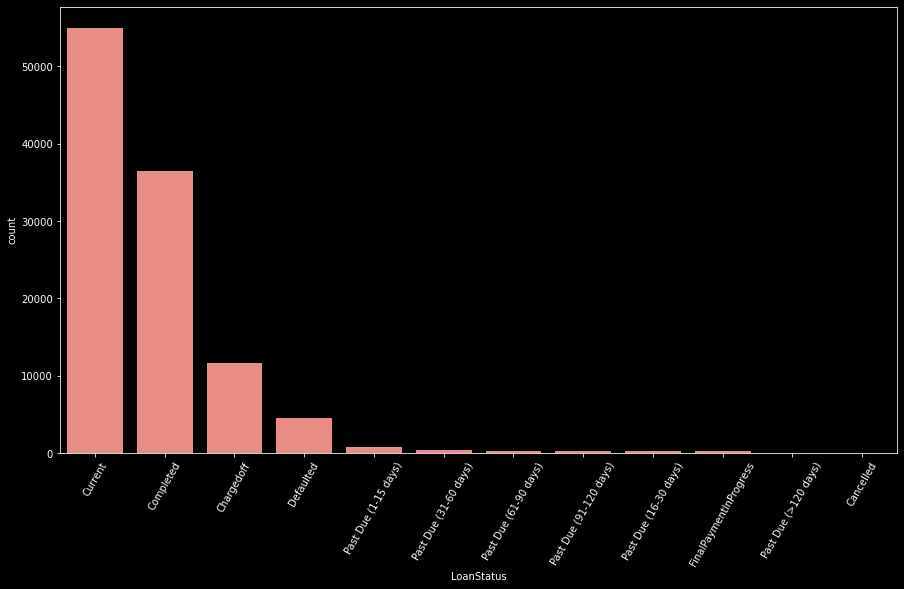

In [24]:
# Visualize LoanStatus distribution

fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
ax.tick_params(axis='x', rotation=60)
sb.countplot(data=loanDF, x='LoanStatus', color=sb.color_palette()[3], order=loanDF.LoanStatus.value_counts().index);

## Countplot analysis - LoanStatus
> As expected the majority of the bank loans are either current(good standing) or completed. However there is a healthy number of ChargedOffs & Defaulted loans.<br/>
> I would like further analysis of failed loans (ChargedOff & Defaulted) & successful loans (Completed)


In [25]:
# create new DF for all Successful loans
successful = loanDF.query('LoanStatus == "Completed"')
current = loanDF.query('LoanStatus == "Current"')
successful.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group,Minor Group
89577,474439,2010-09-04 08:15:17.333,NaN,36,Completed,2012-01-30,0.1436,0.0895,0.0795,-0.0091,0.0870,-0.0091,4.0000,C,6.0000,7,FL,Military Officer,Employed,63.0000,True,False,NaN,2010-09-04 08:15:14,780.0000,799.0000,2002-08-25 00:00:00,6.0000,6.0000,7.0000,3,67.0000,1.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2032.0000,0.3300,3968.0000,0.0000,0.3400,"$50,000-74,999",True,4166.6667,NaN,1000,2010-09-30,Q3 2010,31.7800,1043.8800,1000.0000,43.8800,-4.8900,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,73,"Government - Local, State, Federal",Frontline Security
69969,483444,2010-11-09 09:08:06.800,NaN,36,Completed,2011-10-25,0.2927,0.2575,0.2475,0.1434,0.0980,0.1434,3.0000,D,7.0000,1,MD,Military Enlisted,Employed,46.0000,False,False,NaN,2010-10-25 12:22:50,620.0000,639.0000,2005-09-13 00:00:00,12.0000,11.0000,21.0000,9,159.0000,0.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2718.0000,0.2900,4047.0000,1.0000,0.2400,"$50,000-74,999",True,4250.0000,12.0000,7400,2010-11-18,Q4 2010,297.1700,8819.3300,7400.0000,1419.3300,-55.1300,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,67,"Government - Local, State, Federal",Frontline Security
20042,508891,2011-05-30 10:45:16.313,NaN,36,Completed,2012-06-24,0.3564,0.3199,0.3099,0.2957,0.1470,0.1487,2.0000,E,4.0000,1,TX,Other,Employed,32.0000,True,False,NaN,2011-05-30 10:45:03,700.0000,719.0000,1997-02-01 00:00:00,15.0000,13.0000,38.0000,7,376.0000,3.0000,11.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10644.0000,0.3700,17712.0000,1.0000,0.3700,"$75,000-99,999",True,7166.6667,NaN,7500,2011-06-24,Q2 2011,326.6200,9492.2700,7500.0000,1992.2700,-62.2600,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,158,Other,Other


In [26]:
# make dataframe for failed loans 
failed = loanDF.query('LoanStatus == "Defaulted" or LoanStatus == "Chargedoff"')
failed.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group,Minor Group
78627,338044,2008-05-23 13:35:46.647,D,36,Chargedoff,2008-12-04,0.3461,0.3220,0.3120,NaN,NaN,NaN,NaN,NaN,NaN,4,MN,Accountant/CPA,Full-time,2.0000,True,False,NaN,2008-05-09 11:27:00.577,600.0000,619.0000,1985-06-01 00:00:00,11.0000,9.0000,33.0000,6,481.0000,4.0000,14.0000,0.0000,0.0000,0.0000,1.0000,0.0000,20252.0000,0.9400,315.0000,3.0000,0.3300,"$25,000-49,999",True,3750.0000,NaN,3000,2008-06-03,Q2 2008,131.0000,131.0000,51.6000,79.4000,-2.4700,0.0000,2948.4000,2948.4000,0.0000,1.0000,0,0,0.0000,57,Business & Financial Operations Occupations,Finance
30275,582141,2012-04-24 17:10:42.523,NaN,36,Chargedoff,2014-01-30,0.2885,0.2499,0.2399,0.2340,0.1190,0.1150,3.0000,D,6.0000,1,LA,Professional,Employed,59.0000,True,False,NaN,2012-04-24 17:10:36.000,700.0000,719.0000,1983-11-01 00:00:00,12.0000,9.0000,54.0000,5,771.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,30391.0000,0.7200,9313.0000,1.0000,0.4600,"$50,000-74,999",True,4416.6667,NaN,8000,2012-04-30,Q2 2012,318.0400,5088.6400,2838.9000,2249.7400,-90.0300,0.0000,5161.1000,5161.1000,0.0000,1.0000,0,0,0.0000,18,Business & Financial Operations Occupations,Skilled Labor
53788,505864,2011-05-08 20:51:26.673,NaN,36,Chargedoff,2012-08-16,0.3258,0.2899,0.2799,0.2671,0.1300,0.1371,2.0000,E,1.0000,1,AL,Food Service,Employed,34.0000,False,False,NaN,2011-05-08 20:51:22.000,700.0000,719.0000,1996-12-17 00:00:00,8.0000,8.0000,33.0000,5,129.0000,5.0000,10.0000,0.0000,0.0000,4.0000,0.0000,0.0000,3144.0000,0.3500,3992.0000,0.0000,NaN,"$50,000-74,999",False,5000.0000,18.0000,7500,2011-05-16,Q2 2011,314.2500,3127.5000,1418.4200,1709.0800,-41.8300,-106.8500,6081.5800,6081.5800,0.0000,1.0000,0,0,0.0000,51,Food Preparation & Serving Related Occupations,Labor


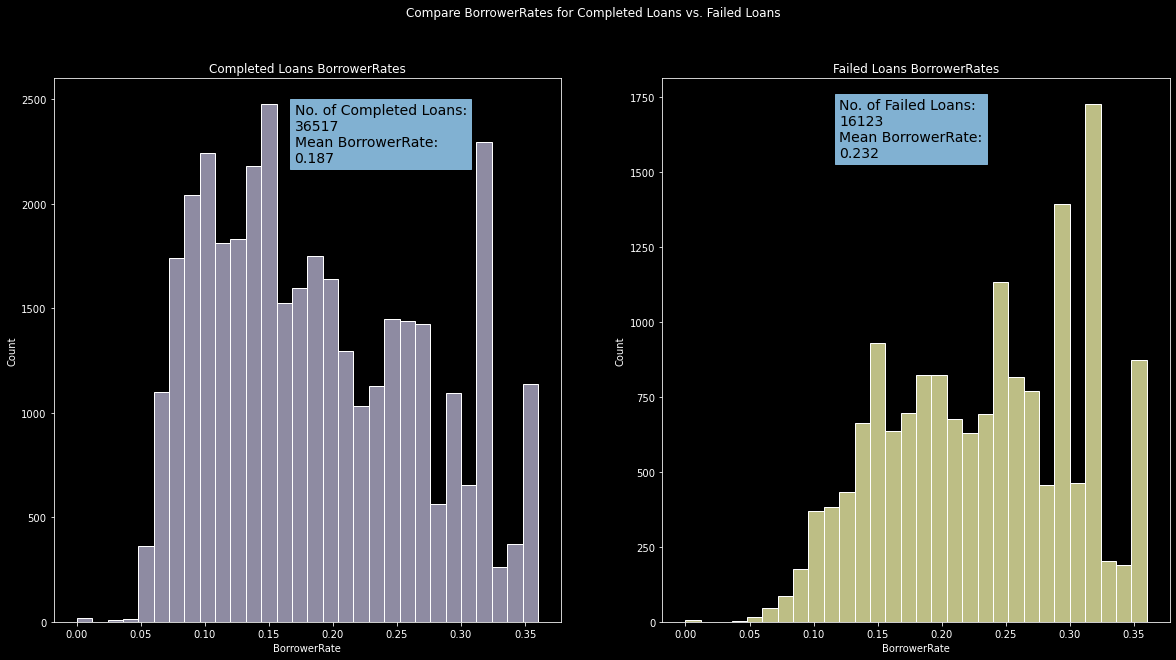

In [29]:
# Compare BorrowerRate's between the Completed loans & the Defaulted & ChargedOff
# would like to stack these but I don't want to single out the "completed" & "failed"
fig, ax = plt.subplots(1,2, figsize = (20,10))
fig.suptitle("Compare BorrowerRates for Completed Loans vs. Failed Loans")

style = dict(size=14, color='black', backgroundcolor=sb.color_palette()[4])

completed_no = "No. of Completed Loans:\n" + str(successful.ListingNumber.count()) + "\n"
completed_mean = "Mean BorrowerRate:\n" + str(round(successful.BorrowerRate.mean(),3))

ax[0].set_title("Completed Loans BorrowerRates")
ax[0].text(0.17,2200,completed_no + completed_mean, **style)
#ax[1].annotate(str(Completed.BorrowerRate.mean()),(0.05,3250))
sb.histplot(data=successful, x='BorrowerRate', bins=30, color=sb.color_palette()[2], ax=ax[0]);

failed_no = "No. of Failed Loans:\n" + str(failed.ListingNumber.count()) + "\n"
failed_mean = "Mean BorrowerRate:\n" + str(round(failed.BorrowerRate.mean(),3))

ax[1].set_title("Failed Loans BorrowerRates")
ax[1].text(0.12,1550,failed_no + failed_mean, **style)
#plt.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='white')
boxf = sb.histplot(data=failed, x='BorrowerRate', bins=30, color=sb.color_palette()[1], ax=ax[1]);

## Bivariate - BorrowRate & LoanStatus
## Histogram Analysis - BorrowerRate
Comparing the BorrowerRate distribution (& mean) for Failed Loans vs. Completed Loans. 

* There are double the number of completed loans to the number of failed loans. This is a much higher ratio than expected.
* As one might guestimate, the completed loans interest rates are lower vs. the failed loans
* There was nothing surprising that came from this visualization


In [33]:
loanDF3 = loanDF.copy()

## LoanOriginalAmount

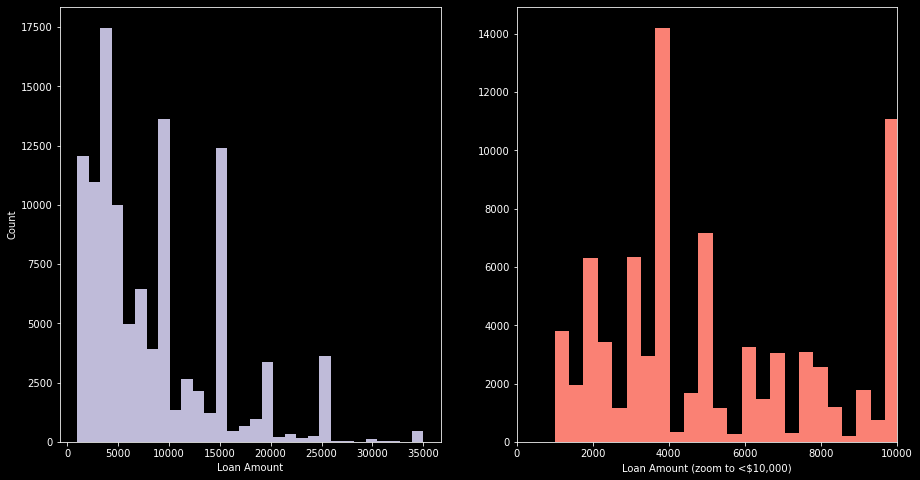

In [34]:
plt.figure(figsize=[15,8])
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
plt.subplot(1,2,1)
#plt.set_title("All loans")
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=30, color=sb.color_palette()[2]);

plt.subplot(1,2,2)
#plt.set_title("Loans <= $5000")
plt.xlabel('Loan Amount (zoom to <$10,000)')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=90, color=sb.color_palette()[3]);
plt.xlim(0,10000);


## Histogram analysis - LoanAmount
* `$`4000 loan is the most prevalent loan amount. Additionally, loan amounts fall in `$`5,000 increments with the highest loans no greater than `$`35,000<br>
* There is a right-skew.<br>
* Nearly half of all Prosper loans are < $5000. What distinguishes these loans from the others?
* Investigate the `$`4000 loans<br>


In [35]:
loanDF3.query("LoanOriginalAmount <= 5000")['LoanOriginalAmount'].describe()

count   49223.0000
mean     3280.4025
std      1190.2072
min      1000.0000
25%      2300.0000
50%      3500.0000
75%      4000.0000
max      5000.0000
Name: LoanOriginalAmount, dtype: float64

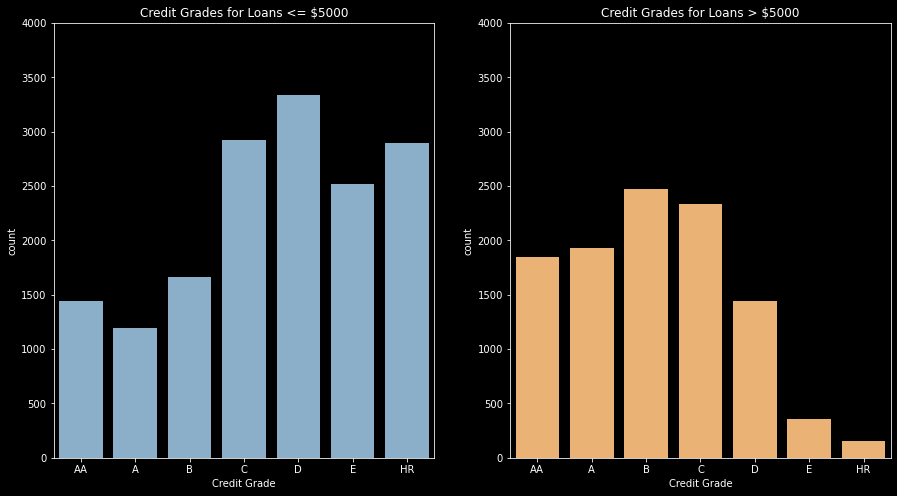

In [36]:
#sb.displot(data=loans5000, x='CreditGrade')
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)

#plt.xlabel('CreditGrade for Loans <= $5000')
graph2 = sb.countplot(data=(loanDF3.query("LoanOriginalAmount <= 5000")), x='CreditGrade', color=sb.color_palette()[4])
graph2.set(title="Credit Grades for Loans <= $5000")
plt.xlabel("Credit Grade")
plt.ylim(0,4000)

plt.subplot(1,2,2)
#plt.xtitle('CreditGrade for Loans <= $5000')
graph = sb.countplot(data=(loanDF3.query("LoanOriginalAmount > 5000")), x='CreditGrade',  color=sb.color_palette()[5]);
graph.set(title="Credit Grades for Loans > $5000")
plt.xlabel("Credit Grade")
#sb.displot(data=loans5000, x='CreditGrade');
plt.ylim(0,4000);

#graph.set_title("Credit Grade Distribution\n Loans > 5000 & Loans <= 5000")

## Bivariate Analysis
### What is the CreditGrade distribution for loans less than 5000 and for loans greater than 5000
* 45% of the loans are <= $5000 where the borrowers CreditGrade is predominately C or below!
* The creditgrades for loans <= 5000 are considerably lower than those that are > 5000<br>

In [37]:
# Loan status totals
print(f"Total value of all loans:\t\t${loanDF3.LoanOriginalAmount.sum()}")
print(f"Total value of all successful loans:\t${successful['LoanOriginalAmount'].sum()}")
#print(f"Total value of all past due loans:\t$  {all_past.LoanOriginalAmount.sum()}") 
print(f"Total value of all failed loans:\t${failed.LoanOriginalAmount.sum()}")

Total value of all loans:		$925315499
Total value of all successful loans:	$228358874
Total value of all past due loans:	$  8006669
Total value of all failed loans:	$105253026


In [43]:
loanDF.IncomeRange.value_counts()

$25,000-49,999    31328
$50,000-74,999    30550
$100,000+         17288
$75,000-99,999    16803
$1-24,999          6992
Not displayed      5471
Not employed        806
0                     0
Name: IncomeRange, dtype: int64

**IncomeRange** -- another interesting variable to compare with others. I'm particularly interested in the $100,000+ bracket.

In [44]:
# explore breakdown of Monthly Incomes
pd.set_option('display.float_format', str)
loanDF['StatedMonthlyIncome'] = loanDF['StatedMonthlyIncome'].astype(np.int64)
loanDF['StatedMonthlyIncome'].describe()

count             109857.0
mean    5646.9412964126095
std      7582.718693821892
min                    0.0
25%                 3250.0
50%                 4708.0
75%                 6845.0
max              1750002.0
Name: StatedMonthlyIncome, dtype: float64

In [45]:
loanDF.Occupation.value_counts().head(100)

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

### What characteristics correlate with lower interest rate for loans?

In [46]:
pd.__version__

'1.4.2'

In [47]:
# Show mean BorrowerRate by State
BorrowerRatebyState = loanDF.groupby('BorrowerState')['BorrowerRate'].mean().sort_values()
print(f"Top 5 states with lowest average interest rate: \n {BorrowerRatebyState.head(5)}")
print(f"Top 5 states with **highest** interest rate: \n{BorrowerRatebyState.tail(5)}")

Top 5 states with lowest average interest rate: 
 BorrowerState
IA   0.16343315217391305
ME   0.16602916666666667
DC   0.17386094986807388
DE   0.17966464646464647
MA   0.18394076259645936
Name: BorrowerRate, dtype: float64
Top 5 states with **highest** interest rate: 
BorrowerState
ID   0.20499347079037802
MS    0.2050526867627785
AR   0.20656082224909308
AL   0.21214664615384615
ND   0.21334285714285714
Name: BorrowerRate, dtype: float64


In [48]:
# Show mean Debt-to-Income-Ratio by State
DebtRatiobyState = loanDF.groupby('BorrowerState')['DebtToIncomeRatio'].mean().sort_values()
print(f"Top 5 states with lowest debt to income ratio: \n {DebtRatiobyState.head(5)}")
print(f"Top 5 states with **highest** deb to income ratio: \n{DebtRatiobyState.tail(5)}")

Top 5 states with lowest debt to income ratio: 
 BorrowerState
DC    0.2251388888888889
NJ   0.23027807486631013
NY   0.24302345058626465
MA   0.24767588549247938
NV   0.24821649484536085
Name: DebtToIncomeRatio, dtype: float64
Top 5 states with **highest** deb to income ratio: 
BorrowerState
MS   0.30052706552706554
ID   0.30224761904761904
WY    0.3123308270676692
MT     0.360551724137931
UT   0.36740208877284597
Name: DebtToIncomeRatio, dtype: float64


In [49]:
# Show mean Debt-to-Income-Ratio by State
DebtRatiobyOccupation = loanDF.groupby('Occupation')['DebtToIncomeRatio'].mean().sort_values()
print(f"Top 5 occupations with lowest debt-to-income ratio: \n {DebtRatiobyOccupation.head(5)}")
print(f"Top 10 occupations with **highest** debt-to-income ratio: \n{DebtRatiobyOccupation.tail(10)}")

Top 5 occupations with lowest debt-to-income ratio: 
 Occupation
Investor                0.17015151515151516
Engineer - Chemical     0.19603603603603606
Computer Programmer     0.20002115655853314
Engineer - Electrical    0.2043967093235832
Pharmacist                          0.20612
Name: DebtToIncomeRatio, dtype: float64
Top 10 occupations with **highest** debt-to-income ratio: 
Occupation
Nurse's Aide                         0.34846491228070176
Flight Attendant                     0.35032520325203254
Waiter/Waitress                       0.4256692913385827
Teacher's Aide                        0.5166153846153846
Student - College Junior              0.6339080459770114
Student - College Graduate Student    0.7515463917525772
Student - Community College           0.9339130434782609
Student - College Senior              1.0156944444444445
Student - Technical School            1.1561538461538463
Homemaker                             2.0154545454545456
Name: DebtToIncomeRatio, dtype: flo

In [50]:
# get top 15 occupations with highest Stated monthly incomes
occupation_income = loanDF.groupby('Occupation')['StatedMonthlyIncome'].mean().sort_values(ascending=False)
occupation_income.head(15)

Occupation
Doctor                       14936.613360323887
Attorney                     11569.706500956023
Judge                        10807.772727272728
Executive                    10737.662259336581
Dentist                      10547.779411764706
Pharmacist                   10208.081712062256
Investor                      9390.233644859813
Pilot - Private/Commercial    8818.336683417085
Engineer - Chemical           8527.662222222221
Principal                     7688.990384615385
Military Officer              7582.031791907514
Engineer - Electrical         7562.134222222222
Computer Programmer           7143.675748101831
Professional                  7049.856765482829
Nurse (RN)                    6752.228605865809
Name: StatedMonthlyIncome, dtype: float64

In [51]:
# lowest stated monthly incomes by occupation
occupation_income.tail(15)

Occupation
Bus Driver                            3673.018987341772
Sales - Retail                       3574.9116910976045
Laborer                              3432.0802507836993
Clerical                              3120.766434892541
Food Service                           2773.73285841496
Nurse's Aide                         2767.5254582484727
Waiter/Waitress                      2454.0573394495414
Teacher's Aide                       2155.5978260869565
Student - College Graduate Student   2054.3020408163266
Student - Community College          1677.2857142857142
Student - College Freshman            1608.219512195122
Student - Technical School                    1368.8125
Student - College Senior              1299.404255319149
Student - College Junior              1189.919642857143
Student - College Sophomore          1005.0434782608696
Name: StatedMonthlyIncome, dtype: float64

In [52]:
# create dictionary to translate "Listing Category (numerical)"
listingcategory_dict = {
    0:'Not Available',
    1:'Debt Consolidation',
    2:'Home Improvement',
    3:'Business',
    4:'Personal Loan',
    5:'Student Use',
    6:'Auto',
    7:'Other',
    8:'Baby & Adoption',
    9:'Boat',
    10:'Cosmetic Procedure',
    11:'Engagement Ring',
    12:'Green Loans',
    13:'Household Expenses',
    14:'Large Purchases',
    15:'Medical/Dental',
    16:'Motorcycle',
    17:'RV',
    18:'Taxes',
    19:'Vacation',
    20:'Wedding Loans'
}

In [53]:
# test dictionary
listingcategory_dict[10]

'Cosmetic Procedure'

In [54]:
# How many loans are there of each ListingCategory
listcat_loans = loanDF['ListingCategory (numeric)'].value_counts().sort_values().tail(10)
print(f"Top 10 Listing Categories \n{listcat_loans}")
print(f"\nTotal # of loans represented by the top 10: {listcat_loans.sum()}")

Top 10 Listing Categories 
18      879
15     1497
13     1968
4      2386
6      2552
3      7167
2      7357
7     10344
0     14673
1     56896
Name: ListingCategory (numeric), dtype: int64

Total # of loans represented by the top 10: 105719


In [55]:
# Convert Series 'listcat' to dataframe using to_frame()
listcat = listcat_loans.to_frame()
listcat

,ListingCategory (numeric)
18,879
15,1497
13,1968
4,2386
6,2552
3,7167
2,7357
7,10344
0,14673
1,56896


In [56]:
listcat.name = 'ListingCategory'

In [57]:
listcat['Listing Category'] = listcat.index
listcat

,ListingCategory (numeric),Listing Category
18,879,18
15,1497,15
13,1968,13
4,2386,4
6,2552,6
3,7167,3
2,7357,2
7,10344,7
0,14673,0
1,56896,1


In [60]:
listingcategory_dict

{0: 'Not Available',
 1: 'Debt Consolidation',
 2: 'Home Improvement',
 3: 'Business',
 4: 'Personal Loan',
 5: 'Student Use',
 6: 'Auto',
 7: 'Other',
 8: 'Baby & Adoption',
 9: 'Boat',
 10: 'Cosmetic Procedure',
 11: 'Engagement Ring',
 12: 'Green Loans',
 13: 'Household Expenses',
 14: 'Large Purchases',
 15: 'Medical/Dental',
 16: 'Motorcycle',
 17: 'RV',
 18: 'Taxes',
 19: 'Vacation',
 20: 'Wedding Loans'}

In [61]:
#listcat.columns = ['count','category']
listcat

,ListingCategory (numeric),Listing Category
18,879,18
15,1497,15
13,1968,13
4,2386,4
6,2552,6
3,7167,3
2,7357,2
7,10344,7
0,14673,0
1,56896,1


In [63]:
listcat_dict = listingcategory_dict.copy()

In [64]:
listcat_dict

{0: 'Not Available',
 1: 'Debt Consolidation',
 2: 'Home Improvement',
 3: 'Business',
 4: 'Personal Loan',
 5: 'Student Use',
 6: 'Auto',
 7: 'Other',
 8: 'Baby & Adoption',
 9: 'Boat',
 10: 'Cosmetic Procedure',
 11: 'Engagement Ring',
 12: 'Green Loans',
 13: 'Household Expenses',
 14: 'Large Purchases',
 15: 'Medical/Dental',
 16: 'Motorcycle',
 17: 'RV',
 18: 'Taxes',
 19: 'Vacation',
 20: 'Wedding Loans'}

In [65]:
#index = 3
#print(f"listcat_loans: {listcat_loans.}")

listcat['
        
#print(f"listcat_loans.loc[index]: {listcat_loans.loc[index]}")
listcat_loans

'for i in len(listcat):\n    listcat[\'category\'] = listingcategory_dict[listcat[i]]\n        \n#print(f"listcat_loans.loc[index]: {listcat_loans.loc[index]}")\nlistcat_loans'

In [82]:
type(listcat)

pandas.core.frame.DataFrame

In [66]:
#listcat_loans['Category'] = listingcategory_dict[listcat_loans.loc[index]
listcat

,ListingCategory (numeric),Listing Category
18,879,18
15,1497,15
13,1968,13
4,2386,4
6,2552,6
3,7167,3
2,7357,2
7,10344,7
0,14673,0
1,56896,1


#### 1-Debt Consolidation @ 58308, 0-Not Avail., 7-other, 2-Home Improvement @ 7433, 3-Business @ 7189, 6-Auto @ 2572 

The category of the listing that the borrower selected when posting their listing: <br/><br/>
*0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement,* <br/>
*3 - Business, 4 - Personal Loan*, 5 - Student Use, <br/>
*6 - Auto, 7- Other*, 8 - Baby&Adoption, 9 - Boat, <br/>
10 - Cosmetic Procedure, 11 - Engagement Ring, <br/>
12 - Green Loans, *13 - Household Expenses*, 14 - Large Purchases, <br/>
*15 - Medical/Dental*, 16 - Motorcycle, 17 - RV, <br/>
*18 - Taxes*, 19 - Vacation, 20 - Wedding Loans <br/>

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

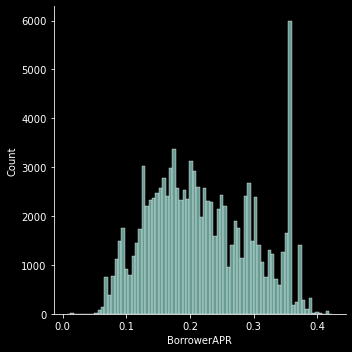

In [67]:
# Univarite exploration of BorrowerAPR
sb.displot(loanDF['BorrowerAPR']);

In [68]:
# What is going on with the interest rate around 0.36? Why are there so many loans with this percentage
borrAPR36 = loanDF.query('BorrowerAPR > 0.36 and BorrowerAPR < 0.37')
borrAPR36.shape

(396, 67)

In [69]:
borrAPR36.sample(10)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group,Minor Group
39207,465823,2010-07-09 14:49:43.767,NaN,36,Defaulted,2011-03-28,0.36742,0.343,0.333,0.1776,0.14,0.1776,2.0,E,6.0,6,TX,Professional,Full-time,29.0,False,False,NaN,2010-07-09 14:49:38.000,640.0,659.0,2000-09-28 00:00:00,8.0,6.0,13.0,1,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,"$25,000-49,999",True,3750,NaN,2500,2010-07-26,Q3 2010,112.1,321.3,76.24,245.06,-18.66,-38.11,2423.76,0.0,475.04,1.0,0,0,0.0,80,Business & Financial Operations Occupations,Skilled Labor
17694,444968,2010-02-01 07:08:27.400,NaN,36,Chargedoff,2011-06-18,0.36742,0.343,0.333,0.2245,0.1,0.2245,3.0,D,8.0,1,OH,Other,Full-time,66.0,False,False,NaN,2010-01-19 05:54:06.000,660.0,679.0,1998-12-23 00:00:00,4.0,4.0,10.0,3,47.0,2.0,9.0,0.0,0.0,4.0,2.0,0.0,450.0,0.04,9805.0,3.0,0.12,"$50,000-74,999",True,4958,NaN,3500,2010-02-16,Q1 2010,156.94,1726.34,727.78,998.56,-29.13,0.0,2772.22,2772.22,0.0,1.0,0,0,0.0,72,Other,Other
39661,459312,2010-05-20 12:21:40.917,NaN,36,Completed,2011-03-08,0.3659,0.3415,0.3315,0.1762,0.14,0.1762,2.0,E,6.0,1,MI,Professional,Full-time,17.0,False,True,9A0B3365565609581265D57,2010-05-12 14:33:26.000,680.0,699.0,1988-02-08 00:00:00,3.0,3.0,39.0,1,20.0,0.0,5.0,1.0,0.0,11.0,1.0,0.0,76.0,0.0,0.0,0.0,0.07,"$50,000-74,999",True,6000,31.0,4650,2010-05-27,Q2 2010,208.12,5760.81,4650.0,1110.81,-32.54,0.0,0.0,0.0,0.0,1.0,0,0,0.0,140,Business & Financial Operations Occupations,Skilled Labor
107410,293979,2008-03-15 20:39:21.850,E,36,Chargedoff,2010-08-20,0.36969,0.35,0.34,NaN,NaN,NaN,NaN,NaN,NaN,1,CA,Doctor,Full-time,39.0,True,False,NaN,2008-02-24 20:22:50.493,580.0,599.0,1989-06-01 00:00:00,14.0,9.0,57.0,6,590.0,29.0,51.0,1.0,5138.0,0.0,0.0,0.0,20229.0,0.68,3576.0,4.0,1.5,"$1-24,999",True,1000,NaN,3100,2008-03-20,Q1 2008,140.23,3195.76,1140.72,2055.04,-51.45,-216.4,1921.55,1959.28,0.0,1.0,0,0,0.0,3,Healthcare Practitioners and Technical Occupat...,Frontline Health
70325,422853,2009-09-04 13:37:11.190,NaN,36,Chargedoff,2013-01-23,0.36845,0.3275,0.3175,0.1188,0.18,0.1188,1.0,HR,4.0,1,CA,Military Enlisted,Full-time,54.0,False,True,1783338468470790930346D,2009-08-25 14:46:26.000,640.0,659.0,2004-09-05 00:00:00,9.0,7.0,13.0,4,298.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,6513.0,0.97,90.0,3.0,0.53,"$25,000-49,999",True,2500,33.0,1000,2009-09-23,Q3 2009,43.97,1538.95,957.8,581.15,-17.73,0.0,42.2,42.2,0.0,1.0,1,0,0.0,22,"Government - Local, State, Federal",Frontline Security
54951,461543,2010-06-07 09:23:28.343,NaN,36,Completed,2010-09-23,0.3659,0.3415,0.3315,0.1762,0.14,0.1762,2.0,E,6.0,7,GA,Fireman,Full-time,47.0,True,False,NaN,2010-06-07 09:23:26.000,660.0,679.0,2003-01-31 00:00:00,10.0,6.0,27.0,3,57.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,918.0,0.91,82.0,0.0,0.11,"$25,000-49,999",True,2837,14.0,3000,2010-06-15,Q2 2010

Some observations (not interesting):
1. The personal loan people had the lowest average credit score, students loans next
2. The RV loan types had the highest average credit score. This infers that people who have the ability to buy RVs are in better financial situations.

### What is going on with the BorrowerAPR/Rate at 31-33% & 36-37%, well over 5000 records? Let's investigate additional info about these records

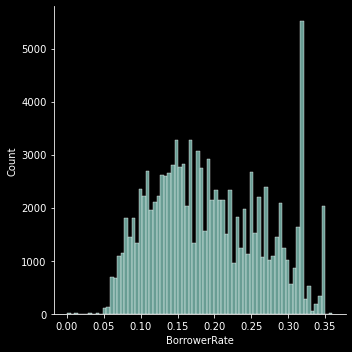

In [70]:
sb.displot(loanDF['BorrowerRate']);

In [71]:
# explore the spike in BorrowerRate around 0.3
BorrRate30 = loanDF.query("BorrowerRate <= 0.33 and BorrowerRate >= 0.30")
BorrRate30.shape

(9395, 67)

In [72]:
BorrRate30.Occupation.value_counts().head(20)

Other                                2900
Professional                         1043
Administrative Assistant              450
Teacher                               343
Sales - Retail                        326
Clerical                              291
Sales - Commission                    262
Executive                             247
Accountant/CPA                        238
Computer Programmer                   222
Skilled Labor                         221
Retail Management                     206
Analyst                               197
Nurse (RN)                            172
Laborer                               172
Food Service                          142
Construction                          133
Military Enlisted                     130
Police Officer/Correction Officer     128
Civil Service                         127
Name: Occupation, dtype: int64

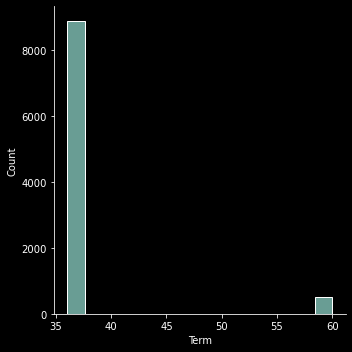

In [73]:
sb.displot(BorrRate30['Term']);

Loan Terms = some 12 month, majority are 36 mnth loans, but healthy percentage at 60 mnth (5 year loan)

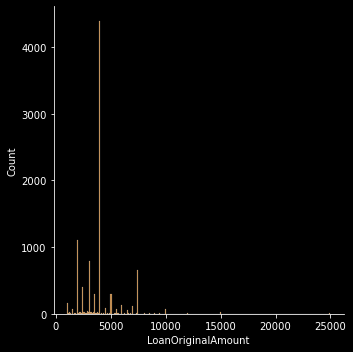

In [74]:
base_color = sb.color_palette()[5]
sb.displot(data = BorrRate30, x = 'LoanOriginalAmount', color = base_color);


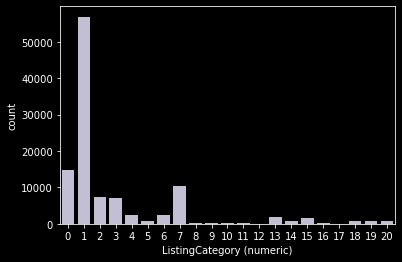

In [75]:
# Use Seaborn's CountPlot as an alternative to compare with plt.hist & seaborn's distplot

base_color = sb.color_palette()[2]
sb.countplot(data = loanDF, x = 'ListingCategory (numeric)', color = base_color);

The category of the listing that the borrower selected when posting their listing: <br/>
    0 - Not Available, <br/>
    1 - Debt Consolidation, <br/>
    2 - Home Improvement, <br/>
    3 - Business, <br/>
    4 - Personal Loan, <br/>
    5 - Student Use, <br/>
    6 - Auto, <br/>
    7- Other, <br/>
    8 - Baby&Adoption, <br/>
    9 - Boat, <br/>
    10 - Cosmetic Procedure, <br/>
    11 - Engagement Ring, <br/>
    12 - Green Loans, <br/>
    13 - Household Expenses, <br/>
    14 - Large Purchases, <br/>
    15 - Medical/Dental, <br/>
    16 - Motorcycle, <br/>
    17 - RV, <br/>
    18 - Taxes, <br/>
    19 - Vacation, <br/>
    20 - Wedding Loans <br/>


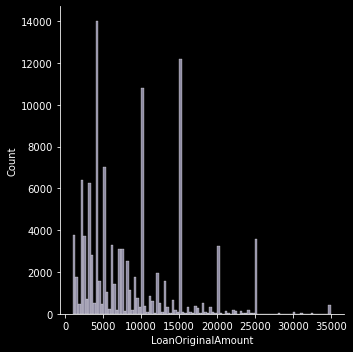

In [76]:
# plot the distribution of LoanAmounts
base_color = sb.color_palette()[2]
sb.displot(data = loanDF, x = 'LoanOriginalAmount', color = base_color);

1. Significant number of loans are multiples of 5000
2. Majority of loans are $15k and less 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [77]:
borrAPR36.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

ListingCategory (numeric)
0              3757.08
1    3553.309523809524
2   3130.8571428571427
3    8671.377358490567
4    2843.978723404255
5    4220.916666666667
6    2277.777777777778
7    2988.235294117647
Name: LoanOriginalAmount, dtype: float64

In [78]:
loanDF.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

ListingCategory (numeric)
0     6515.587200981395
1      9950.95338863892
2     8101.816773141226
3     8929.268034044928
4     4558.143755238893
5     3504.938829787234
6     4994.539576802508
7     5894.036349574632
8     9751.396984924622
9     8734.117647058823
10    5683.516483516483
11    7636.944700460829
12    8621.719298245614
13    5288.151422764227
14    8821.413472706156
15    6519.930527722111
16   5567.2805280528055
17    8230.117647058823
18    7571.873720136518
19    5374.450331125828
20    8845.951760104303
Name: LoanOriginalAmount, dtype: float64

In [79]:
borrAPR36.groupby('ListingCategory (numeric)')['CreditScoreRangeUpper'].mean()

ListingCategory (numeric)
0               558.2
1   632.3333333333334
2   664.7142857142857
3   666.5471698113207
4   590.9148936170212
5               649.0
6   647.8888888888889
7   649.8823529411765
Name: CreditScoreRangeUpper, dtype: float64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!